# Results of the pipeline

903


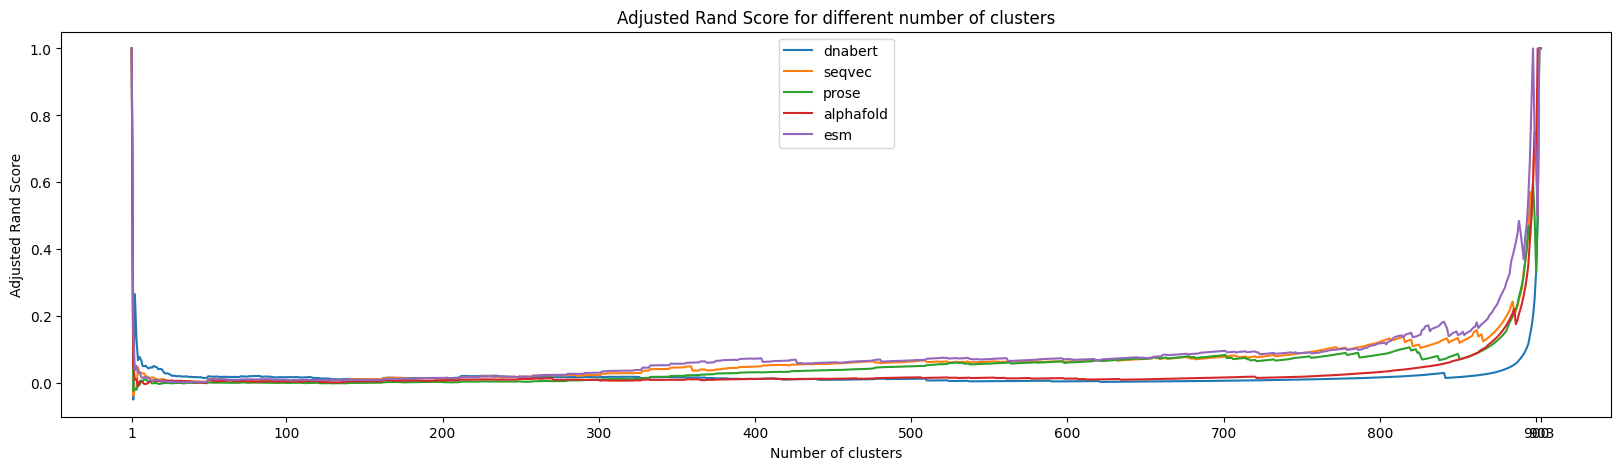

dnabert    seqvec     prose  alphafold       esm
combiner dimensional PCA                                                   
pca      10               0.024881  0.050894  0.092763   0.019873  0.056803
         50               0.023593  0.078443  0.091341   0.051215  0.116836
         all              0.022506  0.089395  0.091341   0.050430  0.146971
average  10               0.023112  0.055414  0.105951   0.021221  0.056464
         50               0.024820  0.102332  0.114138   0.050430  0.097727
         all              0.027776  0.120140  0.114138   0.050174  0.182947
sum      10               0.039121  0.047214  0.052367   0.045220  0.046416
         50               0.042032  0.051151  0.054728   0.054266  0.065679
         all              0.040603  0.055979  0.054631   0.055869  0.065232
max      10               0.017298  0.043575  0.070455   0.012682  0.060767
         50               0.021847  0.047972  0.085849   0.040090  0.145346
         all              0.024905  0.053839  0.084622   0.040713  0.140003

In [1]:
import pickle
from autoembedding.results_manager import results2table
import matplotlib.pyplot as plt
import numpy as np

PATH = '/storagenfs/m.tolloso/BioEmbedding/results/phylogenetic_results_bacterium.pkl'

results = pickle.load(open(PATH, "rb"))
r, best_lst, results_dict_ars = results2table(
    results, 
    embedders= [
        "dnabert", 
        "seqvec", 
        "prose", 
        "alphafold", 
        "esm"
        ],
    combiners = ["pca", "average", "sum", "max"],
    pcas = [ '10', '50', 'all'],
    metric="mean_adjusted_rand_score", 
    
    preferred_metric_embedding="euclidean", 
    preferred_method_embedding="ward", 
    
    preferred_metric_gt="euclidean", # euclidean, average: equivalent to UPGMA when the gt is the distance matrix
    preferred_method_gt="average",
    
    preferred_edge_weight="jaccard",
    preferred_annotation="keywords"
)
# r.to_latex("./latex_output.tex")

fix, _ = plt.subplots(figsize=(20, 5))

plt.xlabel("Number of clusters")
plt.ylabel("Adjusted Rand Score")
plt.title("Adjusted Rand Score for different number of clusters")

plt.ylim(-0.1, 1.05)

X = [i for i in range(len(best_lst), 0, -1)]
print(len(best_lst))

plt.xticks([i for i in range(0, len(best_lst)+1, 100)][1:] + [1] + [len(best_lst)])

plt.plot(X, results_dict_ars['pca']['all']['dnabert'], label='dnabert')
plt.plot(X, results_dict_ars['average']['all']['seqvec'], label='seqvec')
plt.plot(X, results_dict_ars['max']['all']['prose'], label='prose')
plt.plot(X, results_dict_ars['max']['all']['alphafold'], label='alphafold')
plt.plot(X, results_dict_ars['max']['all']['esm'], label='esm')
plt.legend()
plt.show()
r
# plt.savefig(Path(PATH).stem + '.eps')
